In [9]:
from pykrx import stock
import FinanceDataReader as fdr
import pandas as pd
from collections import defaultdict
import missingno as msno

In [2]:
# Top 100 Market Cap data
df = stock.get_market_cap("20100104")
top_100 = df['시가총액'].sort_values(ascending=False)[:100]
top_100_ticker = top_100.index.tolist()

In [3]:
top_100.head()

티커
005930    119165163633000
005490     53358343020000
005380     26212901001000
105560     22949290564200
015760     21973694136000
Name: 시가총액, dtype: int64

In [4]:
series_dict = defaultdict(list)

In [5]:
# Top100 M.C Daily Change 
for ticker in top_100_ticker:
    ohlcv_data = fdr.DataReader(ticker, "20100104", "20190104")
    series_dict[ticker] = ohlcv_data['Change']

In [6]:
top_100_data = pd.DataFrame(series_dict)
top_100_data.head()

,005930,005490,005380,105560,015760,055550,066570,012330,034220,051910,...,001040,001450,000080,011070,001800,068270,088980,103150,005387,001230
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,0.012516,-0.009709,-0.016529,-0.005025,0.004399,0.009259,0.037031,-0.008772,0.057325,-0.019694,...,-0.007983,0.040107,0.003769,0.008073,-0.017258,0.040022,0.019432,0.000000,0.000000,-0.031491
2010-01-05,0.016069,0.009804,-0.075630,-0.011785,-0.005839,0.022936,-0.003963,-0.070796,-0.003614,-0.006696,...,0.016078,-0.007712,0.006258,0.096096,0.017561,0.012802,0.000853,-0.011765,-0.051163,0.019136
2010-01-06,0.023114,-0.009709,0.009091,-0.003407,-0.001468,0.007848,-0.007974,-0.006349,0.008464,0.000000,...,0.000000,0.046632,-0.026119,0.013697,-0.012046,0.022101,-0.003980,-0.005952,-0.011029,0.009389
2010-01-07,-0.033294,-0.009804,-0.045045,-0.011966,-0.005882,-0.030033,-0.076305,-0.031949,-0.057554,-0.042697,...,0.014246,0.000000,-0.039591,-0.058560,-0.049055,-0.021623,-0.008276,-0.008982,-0.003717,0.026010
2010-01-08,0.009840,0.000000,0.000000,0.001730,0.000000,0.019495,-0.034782,0.000000,0.026718,0.014085,...,0.051486,-0.009901,-0.018617,0.028716,0.027592,0.012716,-0.007770,-0.018127,-0.001244,-0.032611


<AxesSubplot: >

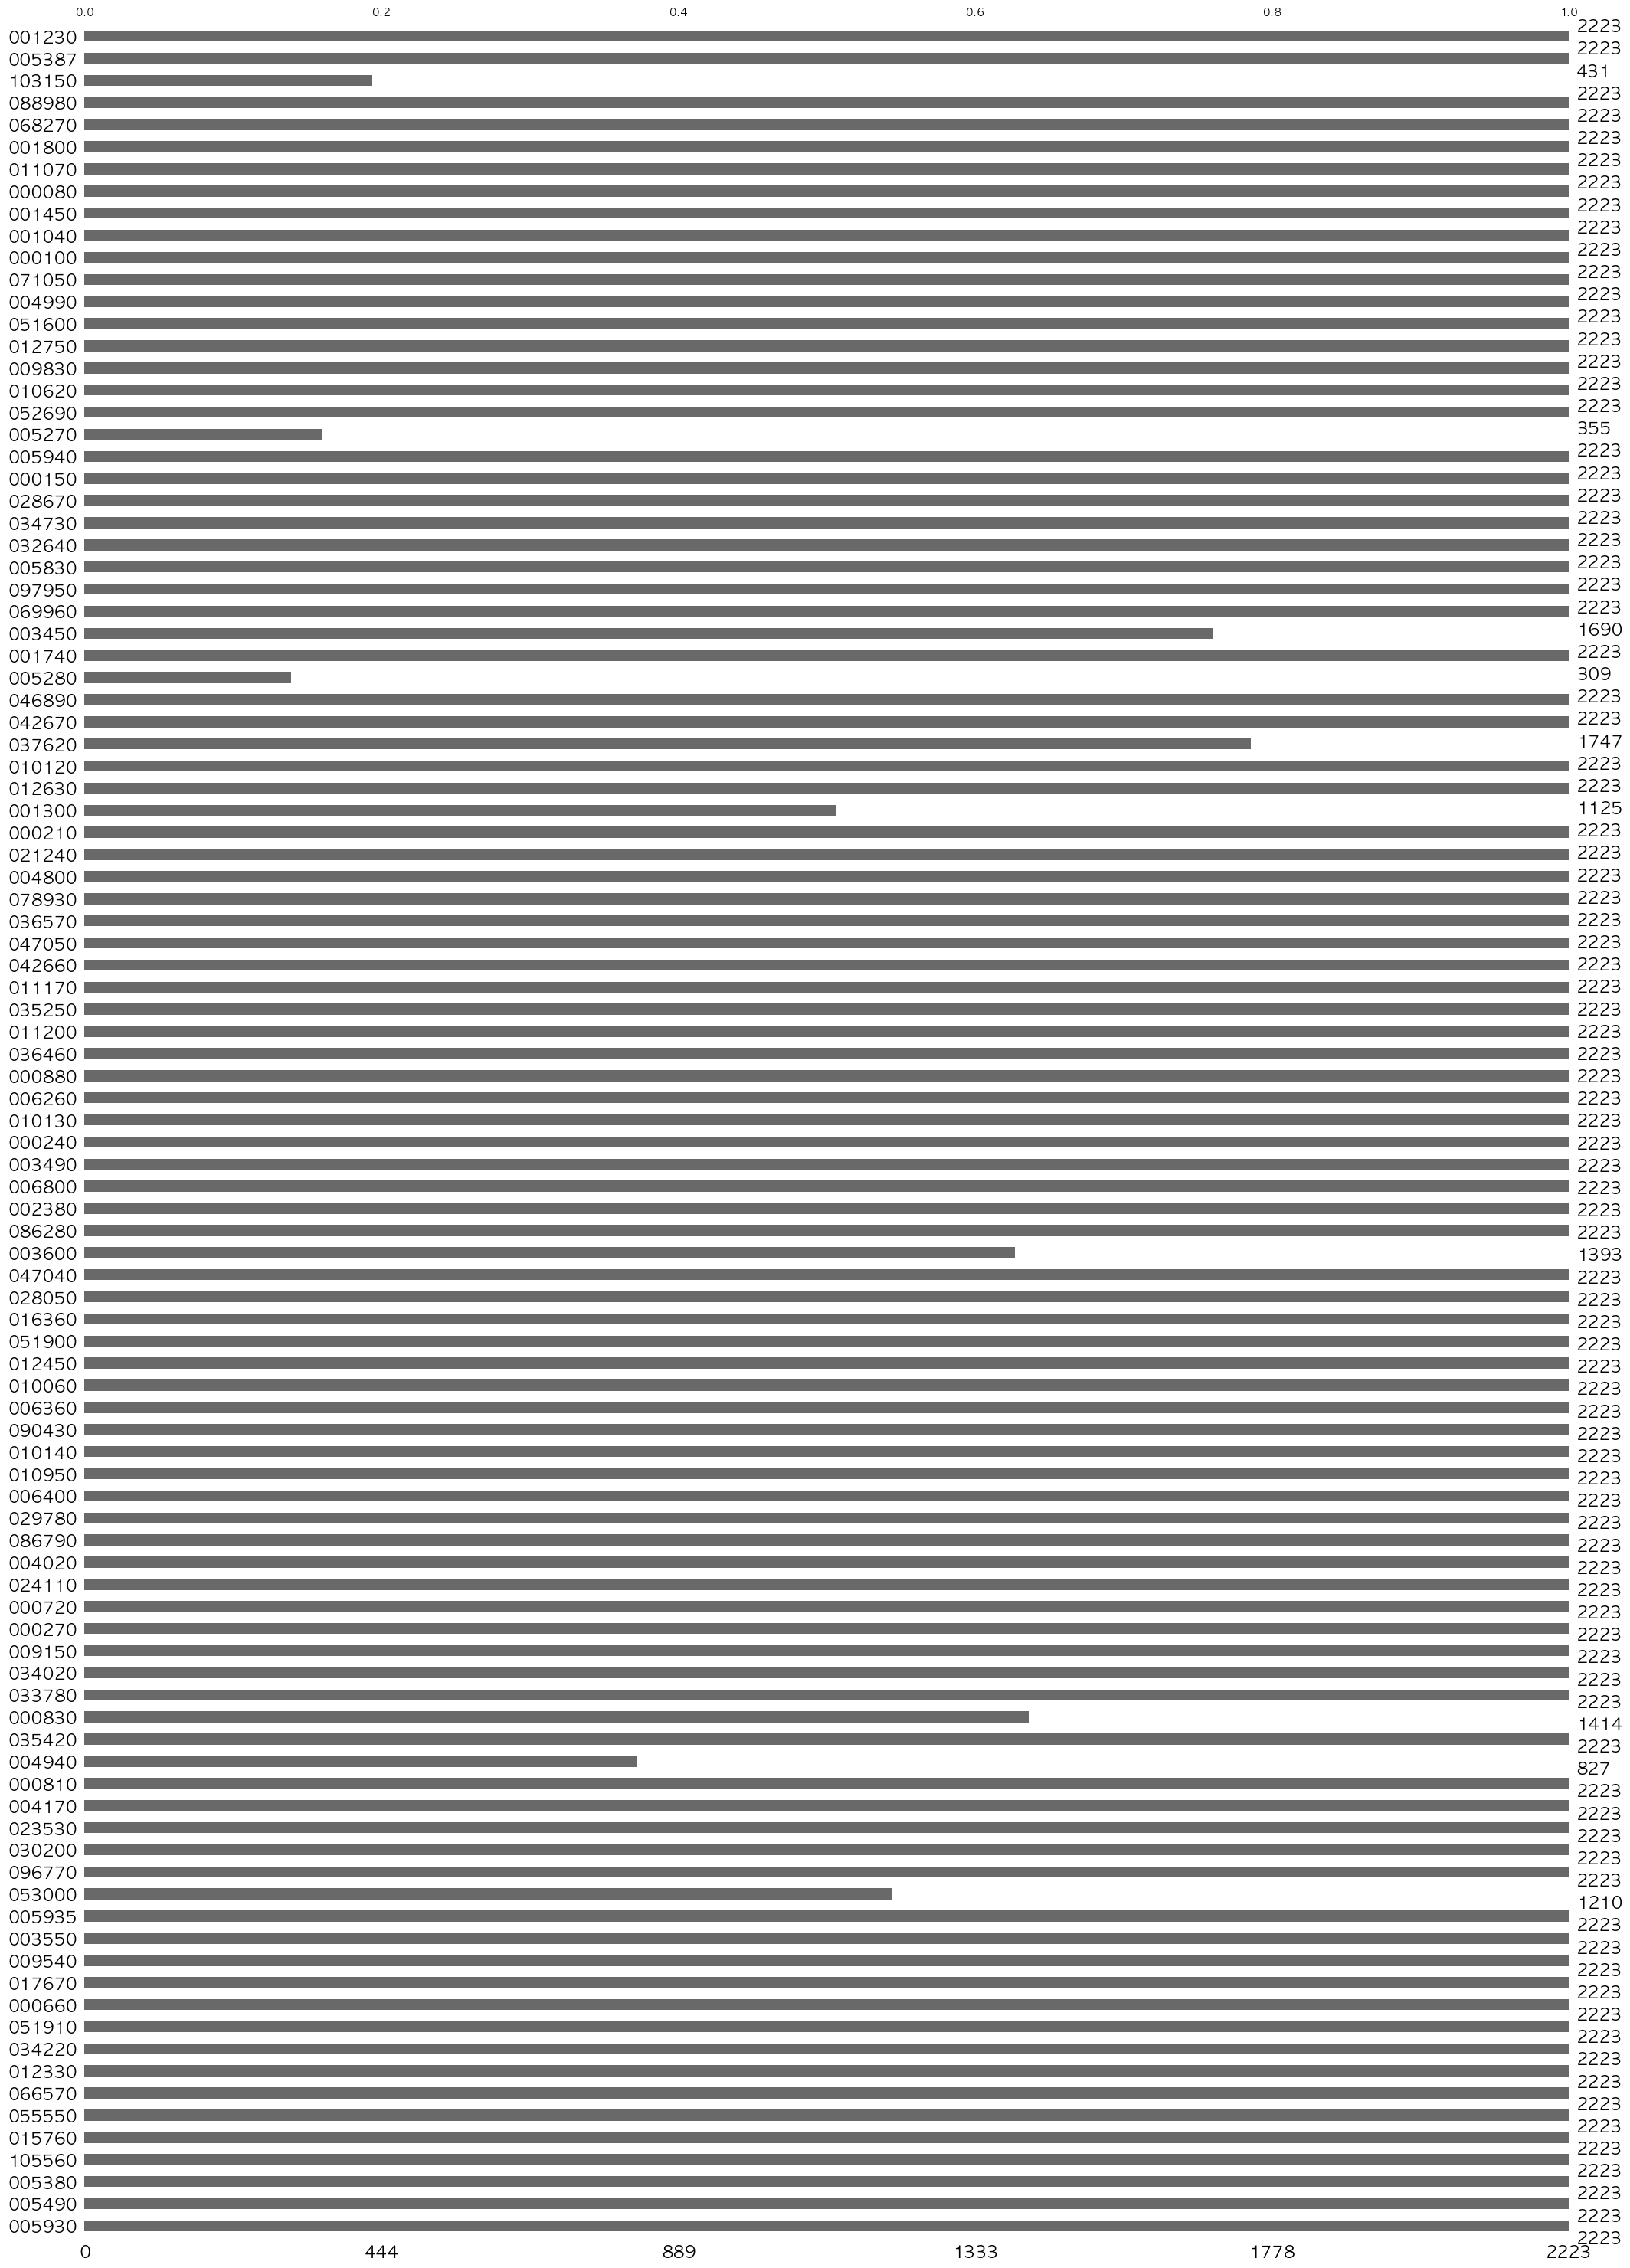

In [11]:
# NAN Check
msno.bar(top_100_data)

In [16]:
# NAN Elimination
top100_data = top_100_data.dropna(axis=1)

In [17]:
# Write to csv file
top_100_data.to_csv('./Data/top100_data.csv')